In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

Text(0.5,1,'Petal')

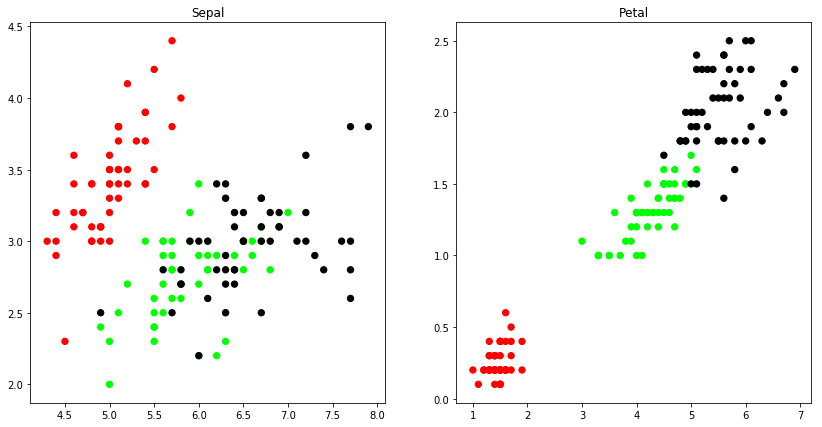

In [2]:
# import some data to play with
iris = datasets.load_iris()

#print("\n IRIS DATA :",iris.data)
#pint("\n IRIS FEATURES :\n",iris.feature_names)
#print("\n IRIS TARGET :\n",iris.target)
#print("\n IRIS TARGET NAMES:\n",iris.target_names)

# Store the inputs as a Pandas Dataframe and set the column names
X = pd.DataFrame(iris.data)

#print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
#print(X.column)
#print("X:",x)
#print("Y:",y)

y = pd.DataFrame(iris.target)
#print(y)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red','lime','black'])

# Plot Sepal
plt.subplot(1,2,1)
plt.scatter(X.Sepal_Length,X.Sepal_Width,c = colormap[y.Targets], s = 40)
plt.title('Sepal')

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y.Targets],s=40)
plt.title('Petal')

In [3]:
# K Means Cluster
model = KMeans(n_clusters = 3)
model.fit(X)

# This is what K Means thought

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

Text(0.5,1,'K Means Classification')

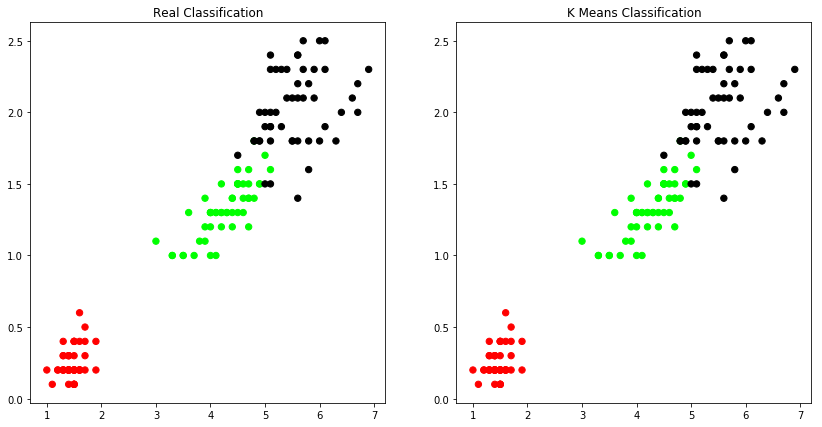

In [4]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))

# Create a colormap
colormap = np.array(['red','lime','black'])

# Plot the Original Classifications
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y.Targets],s = 40)
plt.title('Real Classification')

# Plot the Models Classifications
plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y.Targets],s = 40)
plt.title('K Means Classification')


In [5]:
# The fix, we convert all the 1s to 0s and 0s to 1s.

predY = np.choose(model.labels_,[0,1,2]).astype(np.int64)
print(predY)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


Text(0.5,1,'K Means Classification')

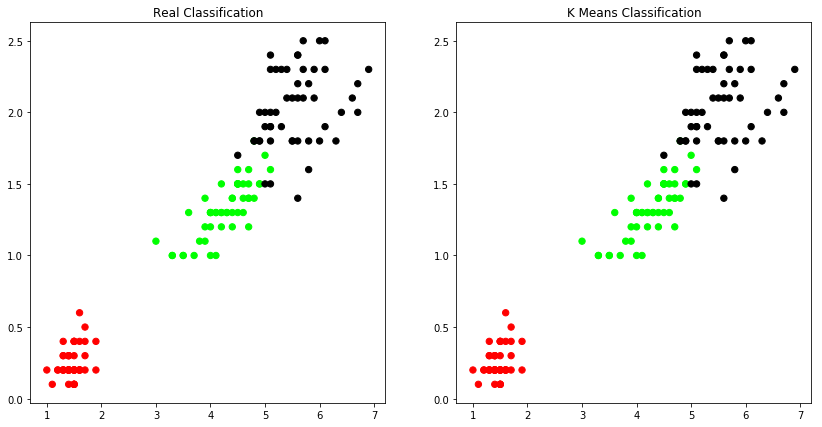

In [6]:
# View the results
# Set the size of the plot
plt.figure(figsize=[14,7])

# Create the colormap
colormap = np.array(['red','lime','black'])

# Plot Original
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y.Targets],s = 40)
plt.title('Real Classification')

plt.subplot(1,2,2)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y.Targets],s = 40)
plt.title('K Means Classification')


In [7]:
# Performance Metrics
sm.accuracy_score(y,predY)

0.8933333333333333

In [8]:
sm.accuracy_score(y,model.labels_)

0.8933333333333333

In [9]:
# Confusion Matrix
sm.confusion_matrix(y,model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

In [10]:
# GMM
from sklearn import preprocessing

scalar = preprocessing.StandardScaler()

scalar.fit(X)

xsa = scalar.transform(X)
xs = pd.DataFrame(xsa,columns = X.columns)
xs.sample(5)

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
8,-1.748856,-0.356361,-1.341272,-1.312977
94,-0.294842,-0.819166,0.250967,0.133226
6,-1.506521,0.800654,-1.341272,-1.181504
30,-1.264185,0.106445,-1.227541,-1.312977
134,0.310998,-1.050569,1.047087,0.264699


In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3)
gmm.fit(xs)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
y_cluster_gmm = gmm.predict(xs)
y_cluster_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Text(0.5,1,'GMM Classification')

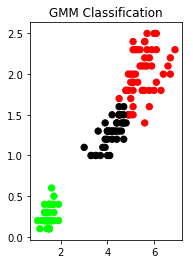

In [13]:
plt.subplot(1,2,1)
plt.scatter(X.Petal_Length,X.Petal_Width,c = colormap[y_cluster_gmm],s = 40)
plt.title('GMM Classification')

In [14]:
sm.accuracy_score(y,y_cluster_gmm)

0.0

In [15]:
# Confusion Matrix
sm.confusion_matrix(y,y_cluster_gmm)

array([[ 0, 50,  0],
       [ 5,  0, 45],
       [50,  0,  0]])

In [16]:
# so the GMM clustering matched the true labels more closely than the Kmans,
# as expected from the plots.